In [1]:
from scipy.optimize import minimize
from qiskit import *
from qiskit.tools.monitor import job_monitor
import numpy as np
from scipy.optimize import minimize
from pylab import *

In [13]:
bit = ['0','1']
dic = []
for i in bit:
    for j in bit:
        for k in bit:
            dic.append(i+j+k)
dic

['000', '001', '010', '011', '100', '101', '110', '111']

In [55]:
bit = ['0','1']
dic = []
n = 4
for k in range(0,2**n):
    dic.append(decToBin(k, n)[::-1])
dic

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

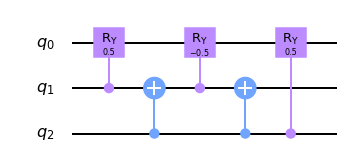

In [17]:
qc = QuantumCircuit(3)
qc.cry(teta/2, 1, 0)
qc.cx(2,1)
qc.cry(-teta/2, 1, 0)
qc.cx(2,1)
qc.cry(teta/2, 2, 0)
qc.draw('mpl')

In [21]:
def ccry(teta):
    qc = QuantumCircuit(3)
    qc.cry(teta/2, 1, 0)
    qc.cx(2,1)
    qc.cry(-teta/2, 1, 0)
    qc.cx(2,1)
    qc.cry(teta/2, 2, 0)
    U = qc.to_gate()
    qc.name = 'CCRY'
    return U

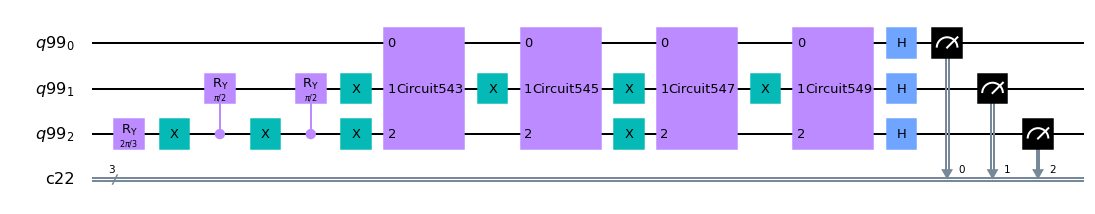

In [47]:
teta = theta
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q, c)

# quantum state preparation
q = circuit.qregs[0]
circuit.ry(teta[0], 2)
circuit.x(2)

circuit.cry(teta[1], 2, 1)
circuit.x(2)

circuit.cry(teta[2], 2, 1)
circuit.x([1,2])

circuit.append(ccry(teta[3]),[q for q in range(3)])

circuit.x([1])

circuit.append(ccry(teta[4]),[q for q in range(3)])
circuit.x(2)
circuit.x(1)
circuit.append(ccry(teta[5]),[q for q in range(3)])
circuit.x(1)
circuit.append(ccry(teta[6]),[q for q in range(3)])


# measurement 
# Add Hadamard gate before put measurement gate to change measurement axis from z to x 
circuit.h(q[0])
circuit.h(q[1])
circuit.h(2)

circuit.measure(range(3), range(3))
circuit.draw('mpl')

In [22]:
# 1. Quantum_module_Z caculate expectation energy for terms of sigma z 
def module_Z(teta):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    circuit = QuantumCircuit(q, c)

    # quantum state preparation
    q = circuit.qregs[0]
    circuit.ry(teta[0], 2)
    #circuit.x(2)

    circuit.cry(teta[1], 2, 1)
    circuit.x(2)

    circuit.cry(teta[2], 2, 1)
    circuit.x([1,2])
    
    for j in range(1, 2**m+1):
        qc.aapend(MCU3(m, teta[]), [q for q in range(n)])
#     circuit.append(ccry(teta[3]),[q for q in range(3)])

#     circuit.x([1])

#     circuit.append(ccry(teta[4]),[q for q in range(3)])
#     circuit.x(2)
#     circuit.x(1)
#     circuit.append(ccry(teta[5]),[q for q in range(3)])
#     circuit.x(1)
#     circuit.append(ccry(teta[6]),[q for q in range(3)])

   
    
    
   
    circuit.measure(range(3),range(3))
# Executing the circuit by qasm_simulation to caculate energy from result.get(counts)    
    shots = 18192
    backend = BasicAer.get_backend('qasm_simulator')
    result = execute(circuit, backend, shots=shots).result()
    counts = result.get_counts()
    
# get full possible keys for counts otherwise we might encounter KeyError where we count nothing for a key
# Remember dic is the list that contain all 2^4=16 possible keys, appending key for count where key in dic but not in count     
    for i in dic:
        if i not in counts:
            counts[i] = 0
# function to calculate probability
    def prob(j):
        e = 0
        for i in counts.keys():
            if i[j] == i[(j+1)%3]:
                e += counts[i]
            else:
                e -= counts[i]
        return e/shots

    # expectation value of energy estimation from counts
    E_J = -(prob(0) + prob(1) + prob(2))
    return E_J
# 2. Quantum_module_X caculate expectation energy for terms of sigma x
def module_X(teta):
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    circuit = QuantumCircuit(q, c)

    # quantum state preparation
    q = circuit.qregs[0]
    circuit.ry(teta[0], 2)
    #circuit.x(2)

    circuit.cry(teta[1], 2, 1)
    circuit.x(2)

    circuit.cry(teta[2], 2, 1)
    circuit.x([1,2])

    circuit.append(ccry(teta[3]),[q for q in range(3)])

    circuit.x([1])

    circuit.append(ccry(teta[4]),[q for q in range(3)])
    circuit.x(2)
    circuit.x(1)
    circuit.append(ccry(teta[5]),[q for q in range(3)])
    circuit.x(1)
    circuit.append(ccry(teta[6]),[q for q in range(3)])


   # measurement 
# Add Hadamard gate before put measurement gate to change measurement axis from z to x 
    circuit.h(q[0])
    circuit.h(q[1])
    circuit.h(2)
   
    circuit.measure(range(3), range(3))
    
# Executing the circuit by qasm_simulation to caculate energy from result.get(counts)    

    shots = 18192
    backend = BasicAer.get_backend('qasm_simulator')
    result = execute(circuit, backend, shots=shots).result()
    counts = result.get_counts()

# get full possible keys for counts otherwise we might encounter KeyError where we count nothing for a key
# Remember dic is the list that contain all 2^4=16 possible keys, appending key for count where key in dic but not in count 
    
    for i in dic:
        if i not in counts:
            counts[i] = 0
# function to calculate probability
    def prob(j):
        e = 0
        for i in counts.keys():
            #i = i[::-1]
            if i[j] == '0':
                e += counts[i]
            else:
                e -= counts[i]
        return e/shots 
# expectation value estimation from counts

    E_Z = -(prob(0)+prob(1)+prob(2))
    return E_Z

# expectation value total 
def vqe(teta):
    # Summing the measurement results
    classical_adder = module_Z(teta) + h * module_X(teta)
    return classical_adder

In [2]:
from Ising_n_exact import *

In [31]:
n = 3
h = float(input())

4


In [32]:
Emin_exact,vec_Emin_exact=groundsate(n,h)
print(Emin_exact/3)
print(vec_Emin_exact)

-4.070367516975992
[-0.42504409 -0.32626039 -0.32626039 -0.32626039 -0.32626039 -0.32626039
 -0.32626039 -0.42504409]


In [33]:
Psi=vec_Emin_exact
print(Psi)

[-0.42504409 -0.32626039 -0.32626039 -0.32626039 -0.32626039 -0.32626039
 -0.32626039 -0.42504409]


In [34]:
theta = Theta(Psi)
print(theta)

[1.5707963267948968, 1.4218125251695366, 1.7197801284202567, 1.3093303465082613, 1.5707963267948957, 1.5707963267948957, 1.832262307081534]


In [29]:
vqe(theta)/3

-3.099091175608326

In [81]:
thetas = []
yvqe = []
for k in range(0,20):
    h = k/10
    Emin_exact,vec_Emin_exact=groundsate(n,h)
    Psi=vec_Emin_exact
    theta = Theta(Psi)
    thetas.append(theta)
    vqe_result = minimize(vqe, theta , method="COBYLA", tol=tol)
    yvqe.append(vqe_result.fun)



Text(0.5, 1.0, 'VQE vs Exact Diagonal')

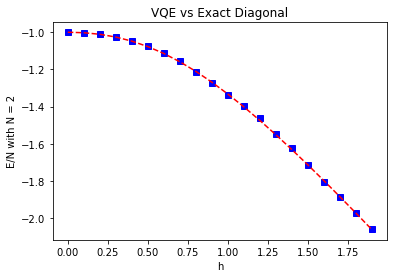

In [82]:
ymean = np.array(yvqe)/3

x = []
for k in range(0,20):
    x.append(k/10)

plot(x,ymean,'bs', label='VQE')
plot(x,z_mean, 'r--',label='Exact')

plt.xlabel('h')
plt.ylabel('E/N with N = 2')
plt.title('VQE vs Exact Diagonal')

In [84]:
print(ymean)

[-1.         -1.00186895 -1.01077397 -1.02675901 -1.04900322 -1.07543609
 -1.11323659 -1.15572779 -1.21322193 -1.27176415 -1.33747435 -1.39484022
 -1.46146291 -1.54975447 -1.62285987 -1.71326224 -1.80751979 -1.88700161
 -1.97490472 -2.05877675]


In [ ]:
## teta 00000


In [85]:
thetas = []
yvqe0 = []
for k in range(0,20):
    h = k/10
    #
    vqe_result = minimize(vqe, [0]*7 , method="COBYLA", tol=tol)
    yvqe0.append(vqe_result.fun)



Text(0.5, 1.0, 'VQE vs Exact Diagonal')

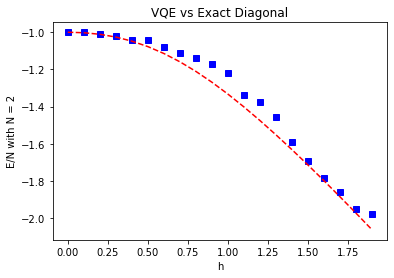

In [86]:
ymean0 = np.array(yvqe0)/3

x = []
for k in range(0,20):
    x.append(k/10)

plot(x,ymean0,'bs', label='VQE')
plot(x,z_mean, 'r--',label='Exact')

plt.xlabel('h')
plt.ylabel('E/N with N = 2')
plt.title('VQE vs Exact Diagonal')

In [87]:
print(ymean0)

[-1.         -1.00086485 -1.00721196 -1.02167619 -1.04217238 -1.0443968
 -1.07796101 -1.11317062 -1.13840516 -1.16977792 -1.21712841 -1.33930299
 -1.37628262 -1.45635444 -1.59201847 -1.69217238 -1.78562005 -1.85771401
 -1.95242597 -1.98057021]


In [91]:
teta0 = [1.5707963267948974, 1.0935651336364978, 2.0480275199532962, 0.8898866921419625, 1.5707963267948966, 1.5707963267948966, 2.2517059614478323]
tol = 1e-3 
h = 1.5
vqe_res = minimize(vqe, teta0 , method="COBYLA", tol=tol)
vqe_res

     fun: -3.7772216796875
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 66
  status: 1
 success: True
       x: array([0.73694153, 2.31938935, 0.79229103, 2.56518537, 1.57173674,
       1.65870801, 2.7673211 ])

In [18]:
teta0 = [1.5707963267948974, 1.0935651336364978, 2.0480275199532962, 0.8898866921419625, 1.5707963267948966, 1.5707963267948966, 2.2517059614478323]
tol = 1e-3 
h = 1.5
vqe_res = minimize(vqe, teta0 , method="COBYLA", tol=tol)
vqe_res

     fun: -4.7471923828125
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 71
  status: 1
 success: True
       x: array([2.24641534, 2.22631263, 2.01934732, 2.20564569, 1.67071836,
       1.69931505, 2.06923498])

In [21]:
vqe_res.fun/3

-1.5823974609375

In [57]:
# from numpy import random
# l = np.pi*random.rand()
#teta0=[np.pi/6]*7
tol = 1e-3 # tolerance for optimization precision.
# Get expectation energy by optimization with corresponding h = 0.1, 0.2,..., 2.9, 3. 
y_vqe = []
for k in range(0,20):
    h = k/10
    vqe_result = minimize(vqe, theta , method="COBYLA", tol=tol)
    y_vqe.append(vqe_result.fun)

In [58]:
z = [-3., -3.00788, -3.03303, -3.07764, -3.14356, -3.23205, -3.34356, 
-3.47764, -3.63303, -3.80788, -4., -4.20713, -4.42711, -4.65797, 
-4.898, -5.14575, -5.4, -5.65973, -5.9241, -6.19242]

In [13]:
len(z)

20

In [59]:
z_mean = np.array(z)/3

In [15]:
#ket qua chay thu 3 ngay mung 14/12

Text(0.5, 1.0, 'VQE vs Exact Diagonal')

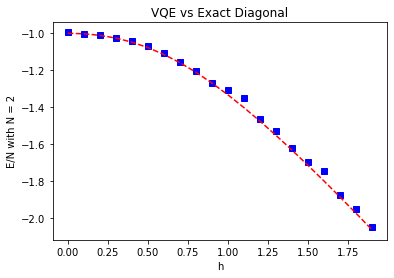

In [60]:
y_mean = np.array(y_vqe)/3

x = []
for k in range(0,20):
    x.append(k/10)

plot(x,y_mean,'bs', label='VQE')
plot(x,z_mean, 'r--',label='Exact')

plt.xlabel('h')
plt.ylabel('E/N with N = 2')
plt.title('VQE vs Exact Diagonal')

In [ ]:
# ket qua cu 

Text(0.5, 1.0, 'VQE vs Exact Diagonal')

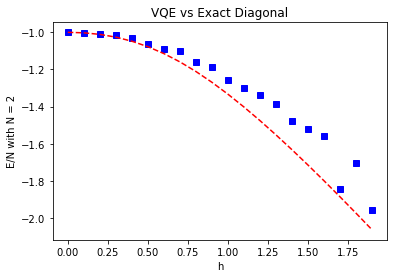

In [142]:
y_mean = np.array(y_vqe)/3

x = []
for k in range(0,20):
    x.append(k/10)

plot(x,y_mean,'bs', label='VQE')
plot(x,z_mean, 'r--',label='Exact')

plt.xlabel('h')
plt.ylabel('E/N with N = 2')
plt.title('VQE vs Exact Diagonal')

In [83]:
teta = [0]*7
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q, c)

# quantum state preparation
q = circuit.qregs[0]

circuit.ry(teta[0], 2)
circuit.cry(teta[1], 2, 1)
circuit.x(2)

circuit.cry(teta[2], 2, 1)
circuit.x(2)
circuit.append(ccry(teta[3]),[q for q in range(3)])

circuit.x(1)
circuit.append(ccry(teta[4]),[q for q in range(3)])
circuit.x(2)
circuit.x(1)
circuit.append(ccry(teta[5]),[q for q in range(3)])
circuit.x(1)
circuit.append(ccry(teta[6]),[q for q in range(3)])
circuit.x(2)
circuit.x(1)


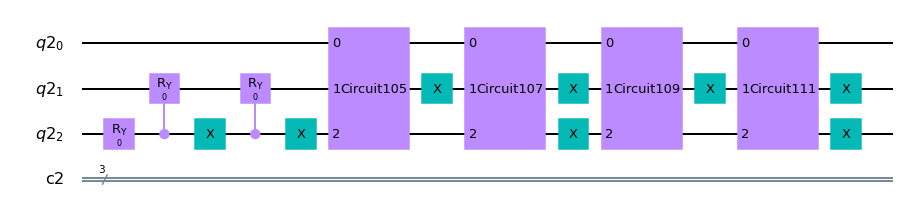

In [84]:
circuit.draw('mpl')

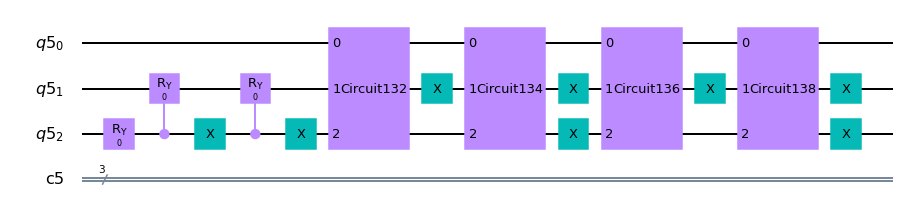

In [87]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q, c)

# quantum state preparation
q = circuit.qregs[0]

circuit.ry(teta[0], 2)
circuit.cry(teta[1], 2, 1)
circuit.x(2)

circuit.cry(teta[2], 2, 1)
circuit.x(2)
circuit.append(ccry(teta[3]),[q for q in range(3)])

circuit.x(1)
circuit.append(ccry(teta[4]),[q for q in range(3)])
circuit.x(2)
circuit.x(1)
circuit.append(ccry(teta[5]),[q for q in range(3)])
circuit.x(1)
circuit.append(ccry(teta[6]),[q for q in range(3)])
circuit.x(2)
circuit.x(1)
circuit.draw('mpl')

In [133]:
x = []
for k in range(0,20):
    x.append(k/10)
len(x)

20

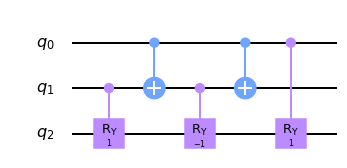

In [30]:
theta=1
qc = QuantumCircuit(3)
qc.cry(theta, 1, 2)
qc.cx(0,1)
qc.cry(-theta, 1, 2)
qc.cx(0,1)
qc.cry(theta, 0, 2)
qc.draw('mpl')

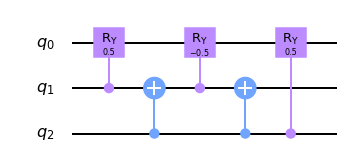

In [7]:
teta=1
qc = QuantumCircuit(3)
qc.cry(teta/2, 1, 0)
qc.cx(2,1)
qc.cry(-teta/2, 1, 0)
qc.cx(2,1)
qc.cry(teta/2, 2, 0)
qc.draw('mpl')

In [95]:
def ccry(theta):
    qc = QuantumCircuit(3)
    qc.cry(theta/2, 1, 2)
    qc.cx(0,1)
    qc.cry(-theta/2, 1, 2)
    qc.cx(0,1)
    qc.cry(theta/2, 0, 2)
    U = qc.to_gate()
    qc.name = 'CCRY'
    return U

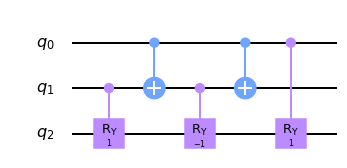

In [92]:
qc = QuantumCircuit(3)
qc.cry(theta, 1, 2)
qc.cx(0,1)
qc.cry(-theta, 1, 2)
qc.cx(0,1)
qc.cry(theta, 0, 2)
U = qc.to_gate
qc.name = 'CCRY'
qc.draw('mpl')

In [94]:
qqc = QuantumCircuit(3)
qqc.x(0)
qqc.x(1)
qqc.append(ccry(2),[q for q in range(3)])
qqc.draw()

┌───┐┌─────────────┐
q_0: ┤ X ├┤0            ├
     ├───┤│             │
q_1: ┤ X ├┤1 circuit195 ├
     └───┘│             │
q_2: ─────┤2            ├
          └─────────────┘

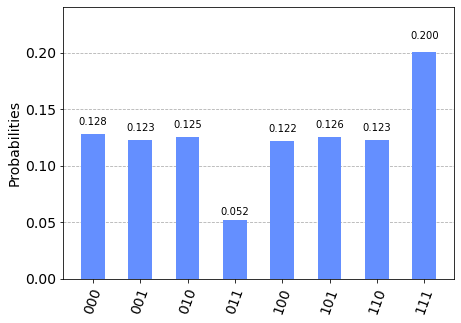

In [123]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.append(ccry(np.pi/5),[q for q in range(3)])
circuit = qc
circuit.measure(range(3), range(3))

# Executing the circuit by qasm_simulation to caculate energy from result.get(counts)    

shots = 8192
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

In [15]:
from qiskit.visualization import plot_histogram

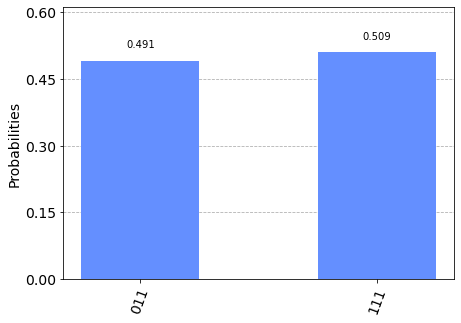

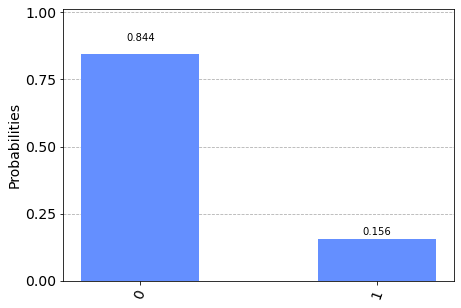

In [100]:
qc = QuantumCircuit(1,1)
qc.ry(np.pi/4,0)

circuit = qc
circuit.measure(range(1), range(1))

# Executing the circuit by qasm_simulation to caculate energy from result.get(counts)    

shots = 8192
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

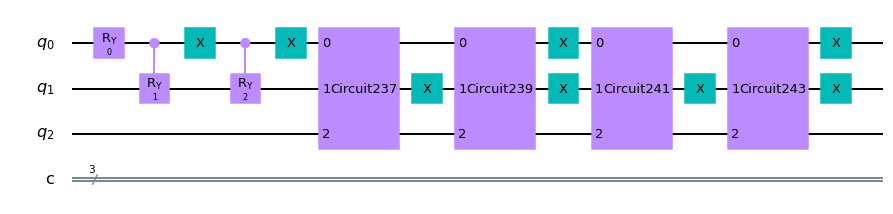

In [109]:
teta = [0,1,2,3,4,5,6]
qc = QuantumCircuit(3,3)
q = circuit.qregs[0]

qc.draw('mpl')

In [24]:
from qiskit.circuit.library import MCMT


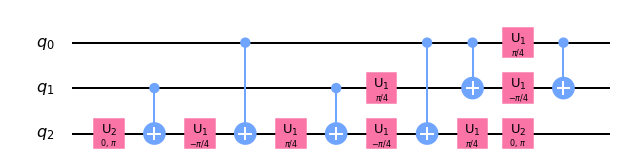

In [70]:
qc = QuantumCircuit(3)
q = qc.qregs[0]
c2x = MCMT('x', 2 , 1, label=None)
c2x.decompose().decompose().draw(output='mpl')



qc = QuantumCircuit(3)
q = qc.qregs[0]
c2x = MCMT('y', 2 , 1, label=None)
c2x.draw()

In [4]:
from qiskit.circuit.library import MCMT


In [8]:
from qiskit.circuit.library.standard_gates.multi_control_rotation_gates import *


In [5]:
from qiskit.circuit.quantumregister import AncillaQubit, AncillaRegister
ancreg = AncillaRegister(1)
anc = AncillaQubit(ancreg, 0)

In [6]:
ancreg = AncillaRegister(1)
anc = AncillaQubit(ancreg, 0)

In [34]:
lisCon = list(Qubit(q, i) for i in range(4))
lisCon

[Qubit(QuantumRegister(4, 'q'), 0),
 Qubit(QuantumRegister(4, 'q'), 1),
 Qubit(QuantumRegister(4, 'q'), 2),
 Qubit(QuantumRegister(4, 'q'), 3)]

In [19]:
[q[i] for i in range(4)]

[Qubit(QuantumRegister(4, 'q'), 0),
 Qubit(QuantumRegister(4, 'q'), 1),
 Qubit(QuantumRegister(4, 'q'), 2),
 Qubit(QuantumRegister(4, 'q'), 3)]

In [19]:
m = 2
n = 5
Qc = QuantumRegister(n)
#Cc = ClassicalRegister(n)
qc = QuantumCircuit(Qc, ancreg)
# mcry(qc, np.pi/2, list(Qc[i] for i in range(n-1, n-m-1, -1)), Qubit(Qc, n-m-1), ancreg, mode='basic',
# use_basis_gates=False)
# qc.draw('mpl')
q = qc.qregs[0]


In [15]:
def MCU3(self, m, angle):
#     Qc = QuantumRegister(n)
#     qc = QuantumCircuit(Qc, ancreg)
    mcry(qc, angle, list(Qc[i] for i in range(n-1, n-m-1, -1)), Qubit(Qc, n-m-1), ancreg, mode='basic',
    use_basis_gates=False)
    U = self.to_gate()
    return U    

In [17]:
MCU3(qc, 3, 1)

In [20]:
qc.append(MCU3(qc, 3, 1), [q[i] for i in range(n)])

CircuitError: 'The amount of qubit/clbit arguments does not match the gate expectation.'

In [39]:
def decToBin(k, n): 
    q1 = bin(k).replace("0b", "")
    q2 = '0'*(n-len(q1)) + q1
    q2 =q2[::-1]
    return q2

In [46]:
ls = decToBin(4,6)
ls

'001000'

In [47]:
ls[2]

'1'

In [133]:
n = 3
teta = []
for l in range(16):
    teta.append(2*l)
#teta = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
q = QuantumRegister(n)
c = ClassicalRegister(n)
ancreg = AncillaRegister(1)
anc = AncillaQubit(ancreg, 0)
circuit = QuantumCircuit(q, c, ancreg)

# quantum state preparation
q = circuit.qregs[0]
circuit.ry(teta[0], n-1)
# #circuit.x(2)

# circuit.cry(teta[1], n-1, n-2)
# circuit.x(n-1)

# circuit.cry(teta[2], n-1, n-2)
# circuit.x([n-1, n-2])
for m in range(1, n):
    for j in range(1, 2**m + 1):
        if (2**(m)-2+j)%2 == 1:
            circuit.x(n-m)
            mcry(circuit, teta[2**(m)-2+j], list(q[i] for i in range(n-1, n-m-1, -1)), Qubit(q, n-m-1), ancreg, mode='basic',use_basis_gates=False)
            circuit.x(n-m)
        else:
            mcry(circuit, teta[2**(m)-2+j], list(q[i] for i in range(n-1, n-m-1, -1)), Qubit(q, n-m-1), ancreg, mode='basic',use_basis_gates=False)

    

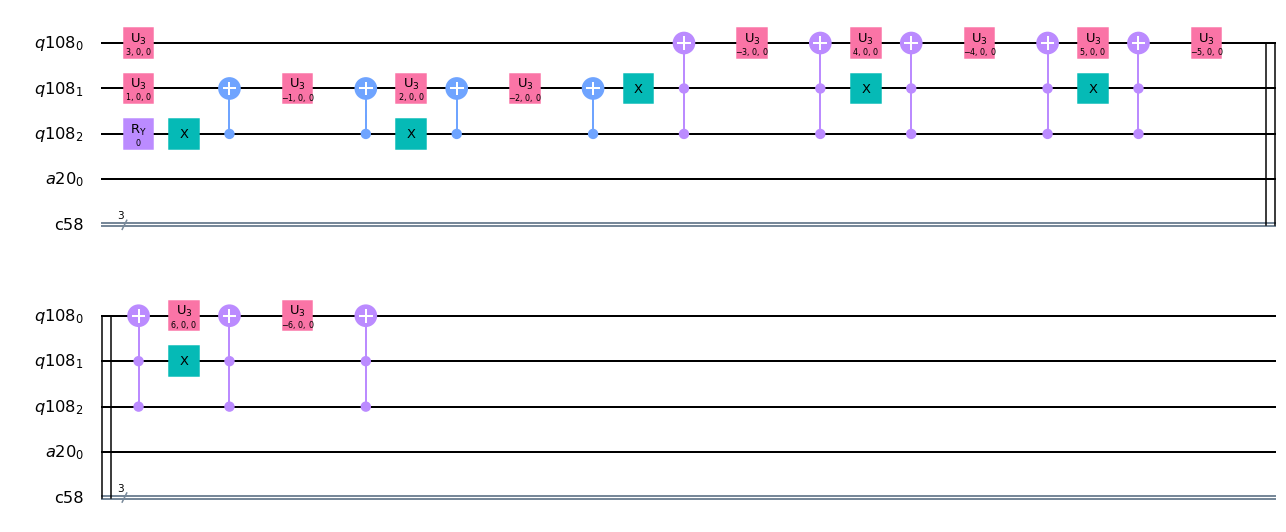

In [134]:
circuit.draw('mpl')

In [50]:
n = 4
teta = []
for l in range(16):
    teta.append(2*l)
#teta = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
q = QuantumRegister(n)
c = ClassicalRegister(n)
ancreg = AncillaRegister(1)
anc = AncillaQubit(ancreg, 0)
circuit = QuantumCircuit(q, c, ancreg)

# quantum state preparation
q = circuit.qregs[0]
circuit.ry(teta[0], n-1)
circuit.x(2)

circuit.cry(teta[1], n-1, n-2)
circuit.x(n-1)

circuit.cry(teta[2], n-1, n-2)
#circuit.x([n-1, n-2])
kt = 2
for m in range(2, n):
    for j in range(0, 2**m):
        j2 = decToBin(j, m)
        for l in range(0, m):
            if (j2[l] == '0'):
                circuit.x(n-m+l)
        kt += 1
        mcry(circuit, teta[kt], list(q[i] for i in range(n-1, n-m-1, -1)), Qubit(q, n-m-1), ancreg, mode='basic',use_basis_gates=False)
        for l in range(0, m):
            if (j2[l] == '0'):
                circuit.x(n-m+l)

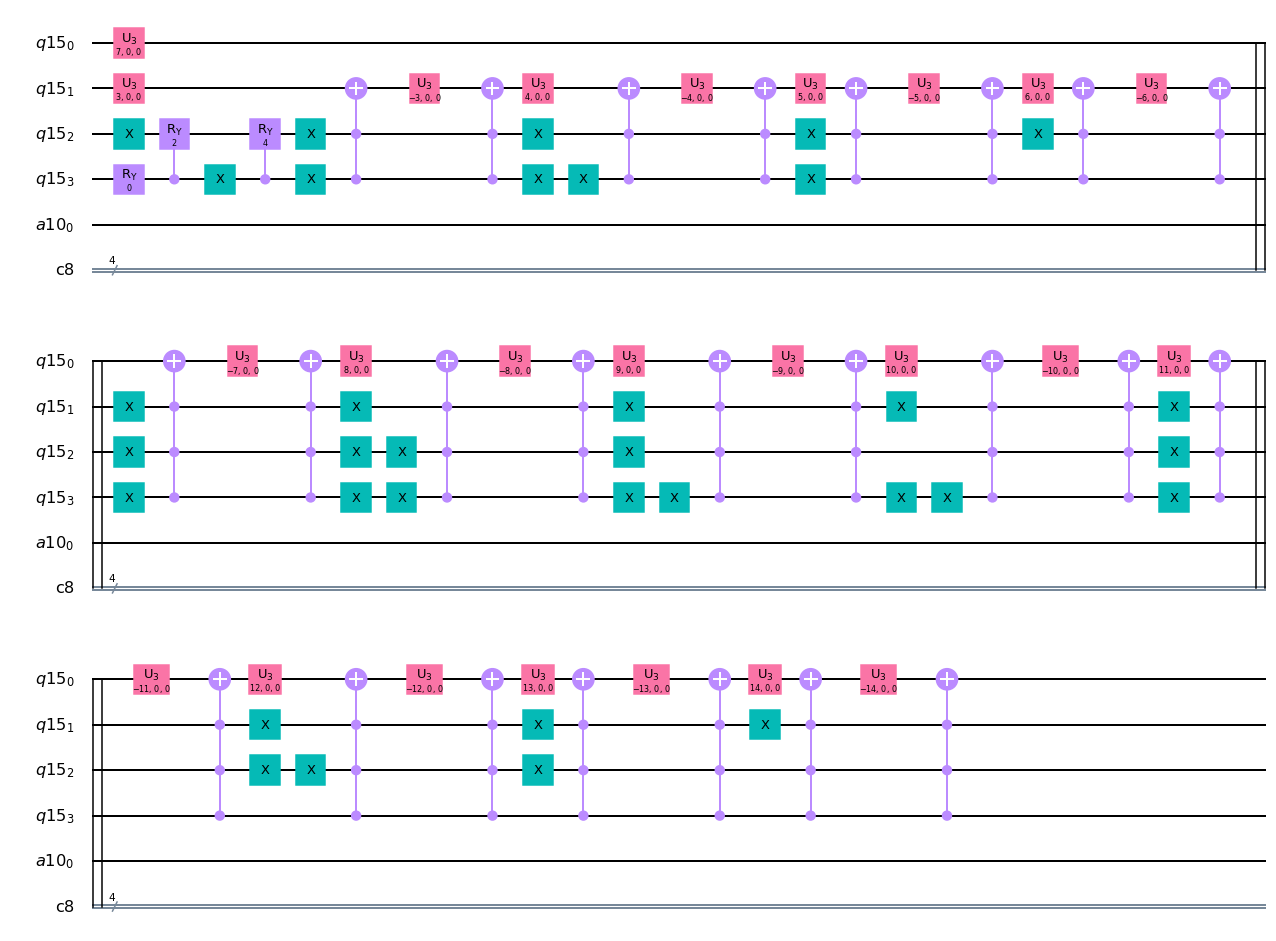

In [51]:
circuit.draw('mpl')

In [7]:
n = 3
teta = []
for l in range(16):
    teta.append(2*l)
#teta = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
q = QuantumRegister(n)
c = ClassicalRegister(n)
ancreg = AncillaRegister(1)
anc = AncillaQubit(ancreg, 0)
circuit = QuantumCircuit(q, c, ancreg)

# quantum state preparation
q = circuit.qregs[0]
circuit.ry(teta[0], n-1)
circuit.x(2)

circuit.cry(teta[1], n-1, n-2)
circuit.x(n-1)

circuit.cry(teta[2], n-1, n-2)
#circuit.x([n-1, n-2])
kt = 2
for m in range(2, n):
    for j in range(0, 2**m):
        j2 = decToBin(j, m)
        for l in range(0, m):
            if (j2[l] == '0'):
                circuit.x(n-m+l)
        kt += 1
        mcry(circuit, teta[kt], list(q[i] for i in range(n-1, n-m-1, -1)), Qubit(q, n-m-1), ancreg, mode='basic',use_basis_gates=False)
            
        for l in range(0, m):
            if (j2[l] == '0'):
                                circuit.x(n-m+l)


In [8]:
qc.draw()

q0_0: ─────
      ┌───┐
q0_1: ┤ X ├
      ├───┤
q0_2: ┤ X ├
      ├───┤
q0_3: ┤ X ├
      └───┘
a0_0: ─────
           
c0: 4/═════

In [9]:
mcry(qc, np.pi/2, list(Qc[i] for i in range(3, 0, -1)), Qubit(Qc, 0), ancreg, mode='basic',
    use_basis_gates=False)

In [10]:
qc.measure(range(4), range(4))

In [12]:
qc.draw()

┌──────────────┐┌───┐┌───────────────┐┌───┐┌─┐         
q0_0: ┤ U3(pi/4,0,0) ├┤ X ├┤ U3(-pi/4,0,0) ├┤ X ├┤M├─────────
      └────┬───┬─────┘└─┬─┘└───────────────┘└─┬─┘└╥┘┌─┐      
q0_1: ─────┤ X ├────────■─────────────────────■───╫─┤M├──────
           ├───┤        │                     │   ║ └╥┘┌─┐   
q0_2: ─────┤ X ├────────■─────────────────────■───╫──╫─┤M├───
           ├───┤        │                     │   ║  ║ └╥┘┌─┐
q0_3: ─────┤ X ├────────■─────────────────────■───╫──╫──╫─┤M├
           └───┘                                  ║  ║  ║ └╥┘
a0_0: ────────────────────────────────────────────╫──╫──╫──╫─
                                                  ║  ║  ║  ║ 
c0: 4/════════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

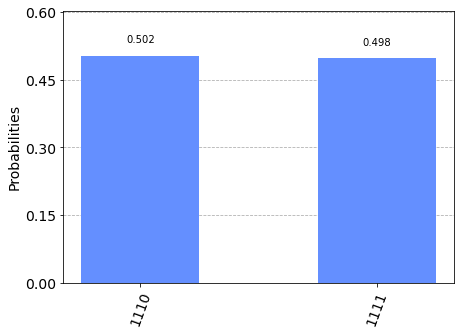

In [117]:
shots = 1
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=shots).result(v)
counts = result.get_counts()
plot_histogram(counts)

In [11]:
from qiskit.visualization import *

In [91]:
shots = 8192
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

No classical registers in circuit "circuit24", counts will be empty.


StopIteration: 

No classical registers in circuit "circuit18", counts will be empty.


In [32]:
# mcry(qc, np.pi, [q[i] for i in range(n-1, 1, -1)], q[0], ancreg, mode='basic',
#     use_basis_gates=False)
mcry(qc, np.pi, lisCon, q[0], ancreg, mode='basic',
    use_basis_gates=False)
circuit = qc
circuit.measure(range(n), range(n))

# Executing the circuit by qasm_simulation to caculate energy from result.get(counts)    

# shots = 8192
# backend = BasicAer.get_backend('qasm_simulator')
# result = execute(circuit, backend, shots=shots).result()
# counts = result.get_counts()
# plot_histogram(counts)



CircuitError: 'register not in this circuit'

In [114]:
MCMT?

In [14]:
mcry?

In [ ]:
Qc = QuantumRegister(4)
Cc = ClassicalRegister(4)
qc = QuantumCircuit(Qc, )

In [50]:
qcr = QuantumRegister(3)
qtr = QuantumRegister(1)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qcr, qtr)

In [55]:
controls = QuantumRegister(3, "c_qb")
target = QuantumRegister(1, "t_qb")
circuit = QuantumCircuit(controls, target)

circuit.mct(controls, target[0], None, mode='advanced')

print(circuit)

             
c_qb_0: ──■──
          │  
c_qb_1: ──■──
          │  
c_qb_2: ──■──
        ┌─┴─┐
t_qb_0: ┤ X ├
        └───┘
